In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from geopandas import GeoDataFrame, read_file

In [3]:
df=pd.read_csv("vgsales.csv")
df

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,1,Wii Sports,Wii,2006.0,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74
1,2,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24
2,3,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.85,12.88,3.79,3.31,35.82
3,4,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00
4,5,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37
...,...,...,...,...,...,...,...,...,...,...,...
16593,16596,Woody Woodpecker in Crazy Castle 5,GBA,2002.0,Platform,Kemco,0.01,0.00,0.00,0.00,0.01
16594,16597,Men in Black II: Alien Escape,GC,2003.0,Shooter,Infogrames,0.01,0.00,0.00,0.00,0.01
16595,16598,SCORE International Baja 1000: The Official Game,PS2,2008.0,Racing,Activision,0.00,0.00,0.00,0.00,0.01
16596,16599,Know How 2,DS,2010.0,Puzzle,7G//AMES,0.00,0.01,0.00,0.00,0.01


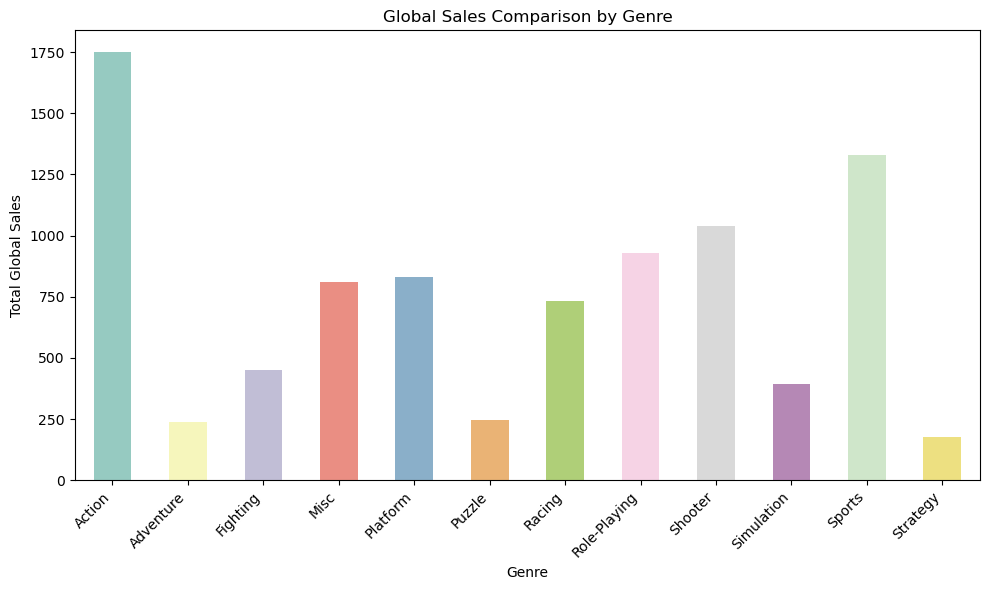

In [5]:
# Bar Chart 
genre_sales = df.groupby('Genre')['Global_Sales'].sum()

plt.figure(figsize=(10, 6))
sns.barplot(x=genre_sales.index, y=genre_sales.values, palette='Set3' , width = 0.5)
plt.xlabel('Genre')
plt.ylabel('Total Global Sales')
plt.title('Global Sales Comparison by Genre')
plt.xticks(rotation=45, ha='right')  
plt.tight_layout()

<Figure size 1000x600 with 0 Axes>

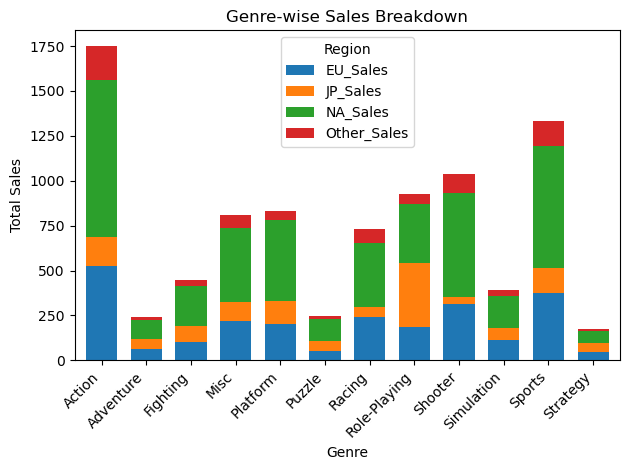

In [6]:
# Stacked Bar chart
genre_sales = df.pivot_table(values=['NA_Sales', 'EU_Sales', 'JP_Sales', 'Other_Sales'], index='Genre', aggfunc=sum)

plt.figure(figsize=(10, 6))
genre_sales.plot(kind='bar', stacked=True , width=0.7)
plt.xlabel('Genre')
plt.ylabel('Total Sales')
plt.title('Genre-wise Sales Breakdown')
plt.xticks(rotation=45, ha='right')
plt.legend(title='Region') 
plt.tight_layout()

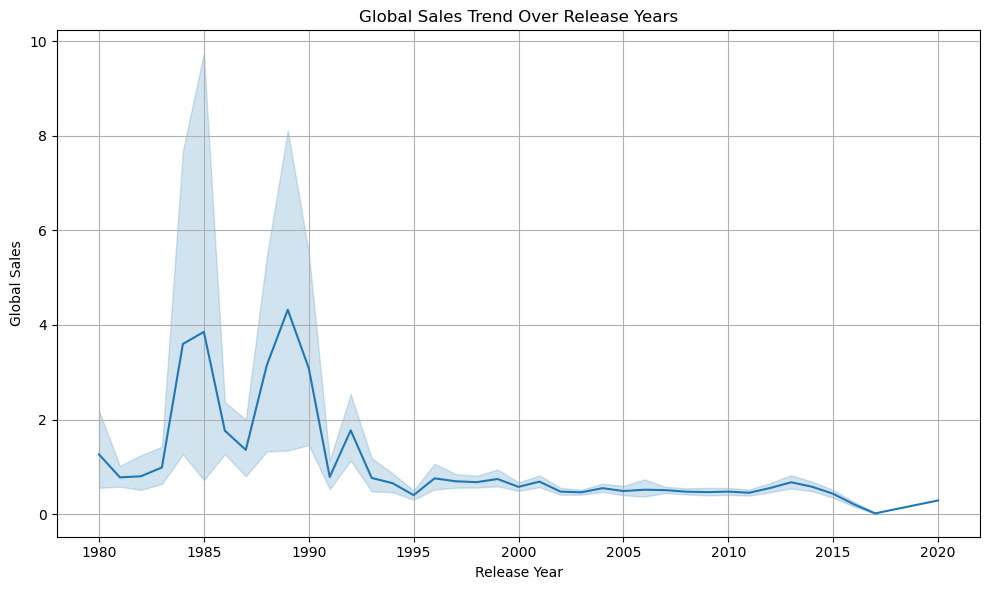

In [7]:
#Line chart 

plt.figure(figsize=(10, 6))
sns.lineplot(x='Year', y='Global_Sales', data=df)
plt.xlabel('Release Year')
plt.ylabel('Global Sales')
plt.title('Global Sales Trend Over Release Years')
plt.grid(True)
plt.tight_layout()

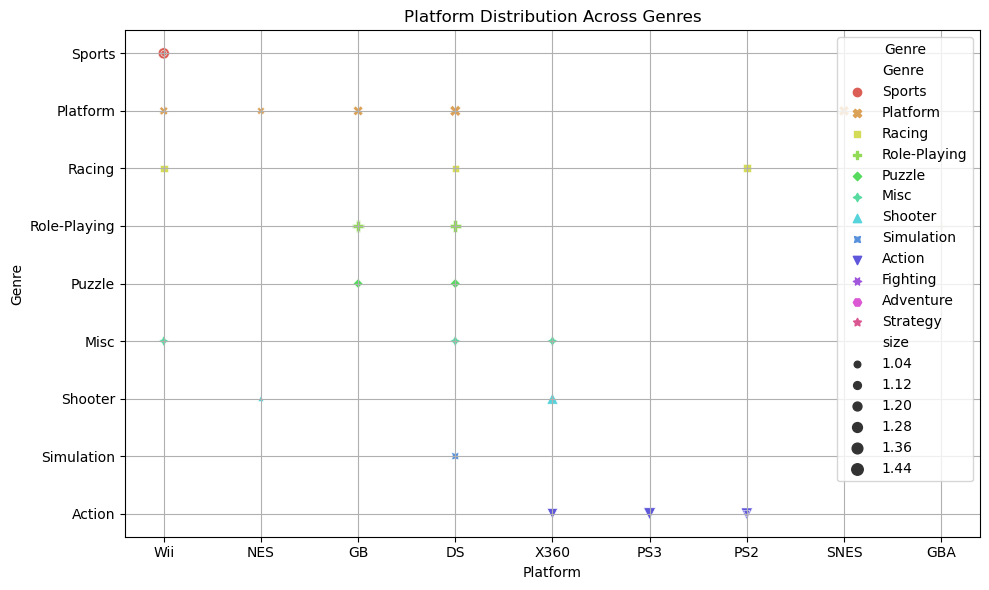

In [22]:
# Scatter plot 

game_count_per_platform = df.groupby('Platform').size().reset_index(name='game_count')

df['size'] = game_count_per_platform['game_count'] ** 0.05

plt.figure(figsize=(10, 6))
sns.scatterplot(x='Platform', y='Genre', hue='Genre', style='Genre', size='size', data=df, palette='hls')
plt.xlabel('Platform')
plt.ylabel('Genre')
plt.title('Platform Distribution Across Genres')
plt.legend(title='Genre')# Shortened legend title
plt.grid(True)
plt.tight_layout()


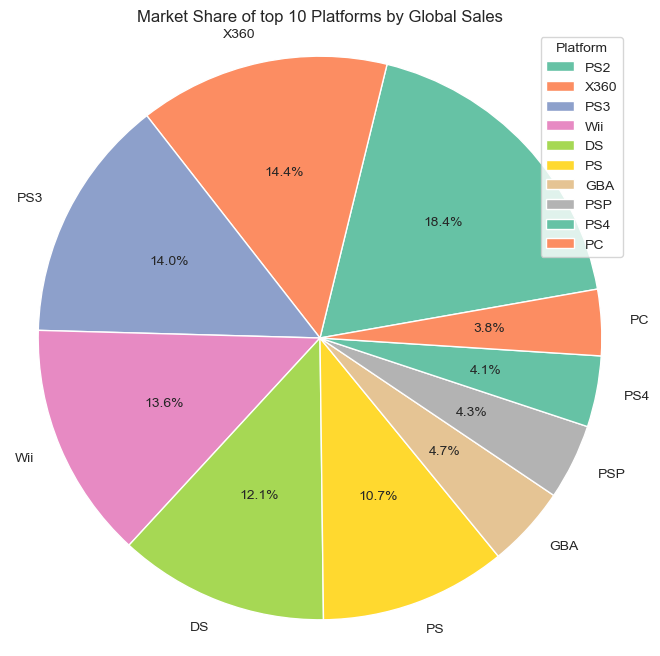

In [85]:
#Pie Chart

platform_sales = df.groupby('Platform')['Global_Sales'].sum().reset_index()

top_n_platforms = 10
platform_sales = platform_sales.nlargest(top_n_platforms, 'Global_Sales')


plt.figure(figsize=(8, 8))
plt.pie(platform_sales['Global_Sales'], labels=platform_sales['Platform'], autopct='%1.1f%%', startangle=10, colors=sns.color_palette('Set2'))  # Adjust colors as desired
plt.axis('equal')
plt.title('Market Share of top 10 Platforms by Global Sales')
plt.legend(title='Platform')

(array([ 0.5,  1.5,  2.5,  3.5,  4.5,  5.5,  6.5,  7.5,  8.5,  9.5, 10.5,
        11.5, 12.5, 13.5, 14.5, 15.5, 16.5, 17.5, 18.5, 19.5, 20.5, 21.5,
        22.5, 23.5, 24.5, 25.5, 26.5, 27.5, 28.5, 29.5, 30.5]),
 [Text(0.5, 0, '2600'),
  Text(1.5, 0, '3DO'),
  Text(2.5, 0, '3DS'),
  Text(3.5, 0, 'DC'),
  Text(4.5, 0, 'DS'),
  Text(5.5, 0, 'GB'),
  Text(6.5, 0, 'GBA'),
  Text(7.5, 0, 'GC'),
  Text(8.5, 0, 'GEN'),
  Text(9.5, 0, 'GG'),
  Text(10.5, 0, 'N64'),
  Text(11.5, 0, 'NES'),
  Text(12.5, 0, 'NG'),
  Text(13.5, 0, 'PC'),
  Text(14.5, 0, 'PCFX'),
  Text(15.5, 0, 'PS'),
  Text(16.5, 0, 'PS2'),
  Text(17.5, 0, 'PS3'),
  Text(18.5, 0, 'PS4'),
  Text(19.5, 0, 'PSP'),
  Text(20.5, 0, 'PSV'),
  Text(21.5, 0, 'SAT'),
  Text(22.5, 0, 'SCD'),
  Text(23.5, 0, 'SNES'),
  Text(24.5, 0, 'TG16'),
  Text(25.5, 0, 'WS'),
  Text(26.5, 0, 'Wii'),
  Text(27.5, 0, 'WiiU'),
  Text(28.5, 0, 'X360'),
  Text(29.5, 0, 'XB'),
  Text(30.5, 0, 'XOne')])

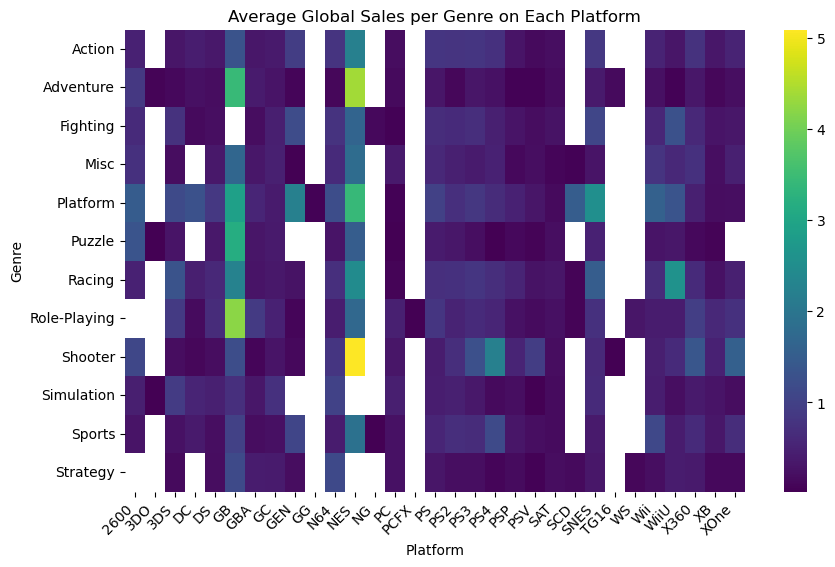

In [24]:
avg_sales_per_genre_platform = df.pivot_table(values='Global_Sales', index='Genre', columns='Platform', aggfunc='mean')

# Create a heatmap with Seaborn
plt.figure(figsize=(10, 6))
sns.heatmap(avg_sales_per_genre_platform, cmap='viridis')
plt.xlabel('Platform')
plt.ylabel('Genre')
plt.title('Average Global Sales per Genre on Each Platform')
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better readability


In [46]:
gs

,NA_Sales,EU_Sales,JP_Sales,Other_Sales
Genre,,,,
Action,877.83,525.00,159.95,187.38
Adventure,105.80,64.13,52.07,16.81
Fighting,223.59,101.32,87.35,36.68
Misc,410.24,215.98,107.76,75.32
Platform,447.05,201.63,130.77,51.59
Puzzle,123.78,50.78,57.31,12.55
Racing,359.42,238.39,56.69,77.27
Role-Playing,327.28,188.06,352.31,59.61
Shooter,582.60,313.27,38.28,102.69


C:\Users\gokulan\AppData\Local\Temp\ipykernel_1936\1632463738.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  gs = df.groupby('Genre')['NA_Sales','EU_Sales','JP_Sales','Other_Sales'].sum()


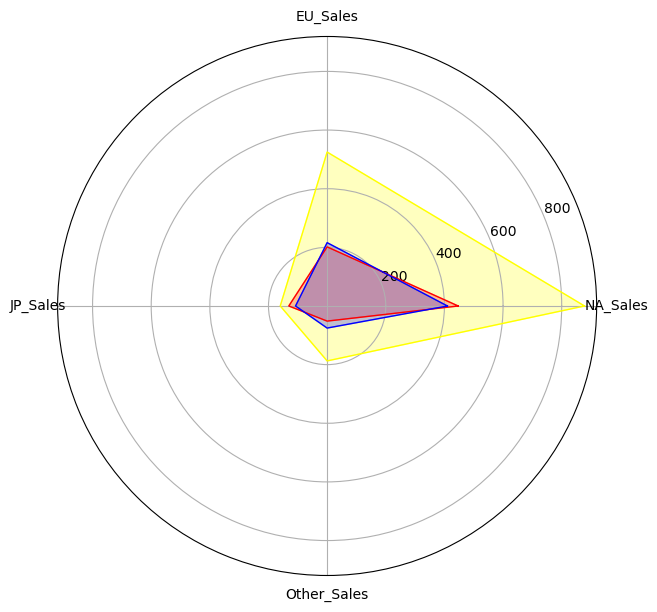

In [50]:
gs = df.groupby('Genre')['NA_Sales','EU_Sales','JP_Sales','Other_Sales'].sum()
labels = ['NA_Sales','EU_Sales','JP_Sales','Other_Sales']
num_vars = len(labels)
angles = np.linspace(0, 2 * np.pi, num_vars, endpoint=False).tolist()
fig, ax = plt.subplots(figsize=(7, 7), subplot_kw=dict(polar=True))
angles += [angles[0]]
genre=['Action','Platform','Misc']
colur=['yellow','red','blue',]
for i in range(3):
    values = gs.loc[genre[i]].tolist()
    values += values[:1]
    ax.plot(angles, values, color=colur[i], linewidth=1)
    ax.fill(angles, values, color=colur[i], alpha=0.25)

ax.set_thetagrids(np.degrees(angles[:-1]), labels)
plt.show()